## this notebook plots bottleneck size vs time between symptom onset (days) for each pair where this information is available

### import modules and dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import glob
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import splitext
from functools import reduce
from pandas.api.types import is_numeric_dtype
import warnings
from pandas.core.common import SettingWithCopyWarning
from matplotlib.font_manager import FontProperties 
from matplotlib import cm
import itertools
from matplotlib import container
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib as mpl
from pandas.plotting import table
import seaborn as sns
from scipy import stats


from matplotlib.lines import Line2D
import matplotlib.patches as mpatches



In [2]:
# initialize list of lists
data = [['pair 1a',0,1,1], ['pair 1b',0,1,0], ['pair 2a',2,2,707], ['pair 2b',2,2,1], ['pair 3a',4,3,42], ['pair 3b',4,3,13], ['pair 4',6,5,34], ['pair 5',4,4,0], ['pair 6a',2,2,1000], ['pair 6a',2,2,2], ['pair 7',1,4,10], ['pair 8a',1,'NaN',0], ['pair 8b',1,'NaN',1], ['pair 9a',0,'NaN',35], ['pair 9a',0,'NaN',1], ['pair 10a',0,1,0], ['pair 10b',0,1,1], ['pair 11a',0,0,0], ['pair 11b',0,0,1], ['pair 12a',0,1,1], ['pair 12b',0,1,1], ['pair 13a',0,'NaN',15], ['pair 13b',0,'NaN',7], ['pair 14',3,4,9], ['pair 15',8,5,99], ['pair 16',7,6,3], ['pair 17',3,'NaN',312], ['pair 18',3,'NaN',348], ['pair 19',3,'NaN',7], ['pair 20a',0,'NaN',122], ['pair 20b',0,'NaN',46], ['pair 21a',0,'NaN',8], ['pair 21b',0,'NaN',1000], ['pair 22a',0,'NaN',5], ['pair 22b',0,'NaN',1000], ['pair 23',0,3,0], ['pair 24',0,3,0], ['pair 25a',0,0,0], ['pair 25b',0,0,0], ['pair 26a',0,'NaN',1], ['pair 26b',0,'NaN',0], ['pair 27a',0,'NaN',1], ['pair 27b',0,'NaN',1], ['pair 28',3,10,1]]

# Pairs = 'pair 1a', 'pair 1b', 'pair 2a', 'pair 2b', 'pair 3a', 'pair 4', 'pair 5', 'pair 6a', 'pair 6b', 'pair 7', 'pair 8a', 'pair 8b', 'pair 9a', 'pair 9b', 'pair 10a', 'pair 10b', 'pair 11a', 'pair 11b', 'pair 12a', 'pair 12b', 'pair 13a', 'pair 13b', 'pair 14', 'pair 15', 'pair 16', 'pair 17', 'pair 18', 'pair 19', 'pair 20a', 'pair 20b', 'pair 21a', 'pair 21b', 'pair 22a', 'pair 22b', 'pair 23', 'pair 24', 'pair 25a', 'pair 25b', 'pair 26a', 'pair 26b', 'pair 27a', 'pair 27b', 'pair 28'
# Time between symptoms = 1,1,2,2,3,3,5,4,2,2,4,-,-,-,-,1,1,0,0,1,1,-,-,4,5,6,-,-,-,-,-,-,-,-,-,3,3,0,0,-,-,-,-,10
# Time betwee test = 0,0,2,2,4,4,6,4,2,2,1,1,1,0,0,0,0,0,0,0,0,3,3,8,7,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['pair', 'time_between_sample_collection', 'time_between_symptoms', 'Nb'])

#

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/katbraun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


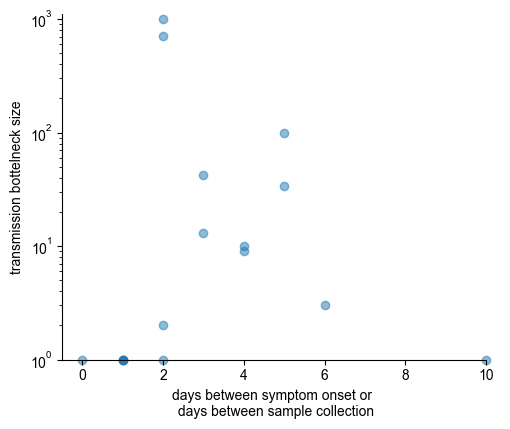

In [6]:
# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(14,8), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 12)

ax1 = fig.add_subplot(gs[0,0:4]) # JT/TV plot

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
    
# set fontsize of axes 
ax1.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 10)

colorlist = ['lightcoral', 'brown', 'red', 'coral', 'sienna', 'chocolate', 'sandybrown', 'darkorange', 'tan', 'wheat', 'darkgoldenrod', 'gold', 'darkkhaki', 'olive', 'yellowgreen', 'darkseagreen', 'green', 'lightseagreen', 'teal', 'cadetblue', 'skyblue', 'slategrey', 'royalblue', 'navy', 'slateblue', 'mediumorchid', 'plum', 'orchid', 'lightpink']
    
# FOR PLOT A 
ax1.scatter(df.time_between_symptoms, df.Nb, alpha=0.5, clip_on=False)
# ax1.scatter(df.time_between_sample_collection, df.Nb, c='#EAD9C1', alpha=1.0, clip_on=False)

# c='#9FBDCE'

# edit the axes - ax1
ax1.set_title('', fontname='Arial', fontsize=14)
ax1.set_ylabel('transmission bottelneck size', fontname='Arial', fontsize=10)
ax1.set_xlabel('days between symptom onset', fontname='Arial', fontsize=10)
ax1.set_facecolor('white')
for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")
ax1.set_ylim(1, 1100)
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_xlim(-0.5, 10)
ax1.set_xticks([0,2,4,6,8,10])

ax1.set_yscale('log')

plt.margins(y=10)

plt.legend()

# use tight_layout to optimize spacing of axes and titles within each subplot
fig.tight_layout()
plt.legend(frameon=False, ncol=2, bbox_to_anchor = [1.05, 0.07]) 
fig.show()

# save this plot to the figures folder 
fig.savefig("../figures/Nb-vs-symptom-collection.pdf", bbox_inches='tight', dpi=300)
